In [1]:
import torch
from yolov5.models.yolo import Model

In [103]:
model = torch.hub.load('ultralytics/yolov5', 'custom', path='detection_best.pt')
model.conf = 0.5
model.iou = 0.3

Using cache found in C:\Users\ADMIN/.cache\torch\hub\ultralytics_yolov5_master
YOLOv5  2025-4-13 Python-3.12.7 torch-2.6.0+cu124 CUDA:0 (NVIDIA GeForce RTX 3060, 12288MiB)

Fusing layers... 
YOLOv5l summary: 400 layers, 47364662 parameters, 0 gradients
Adding AutoShape... 


D:\User\Jansen\Self Study\2025 - 04 - APRIL\CIFAR-10 CNN\yolov5\models\common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


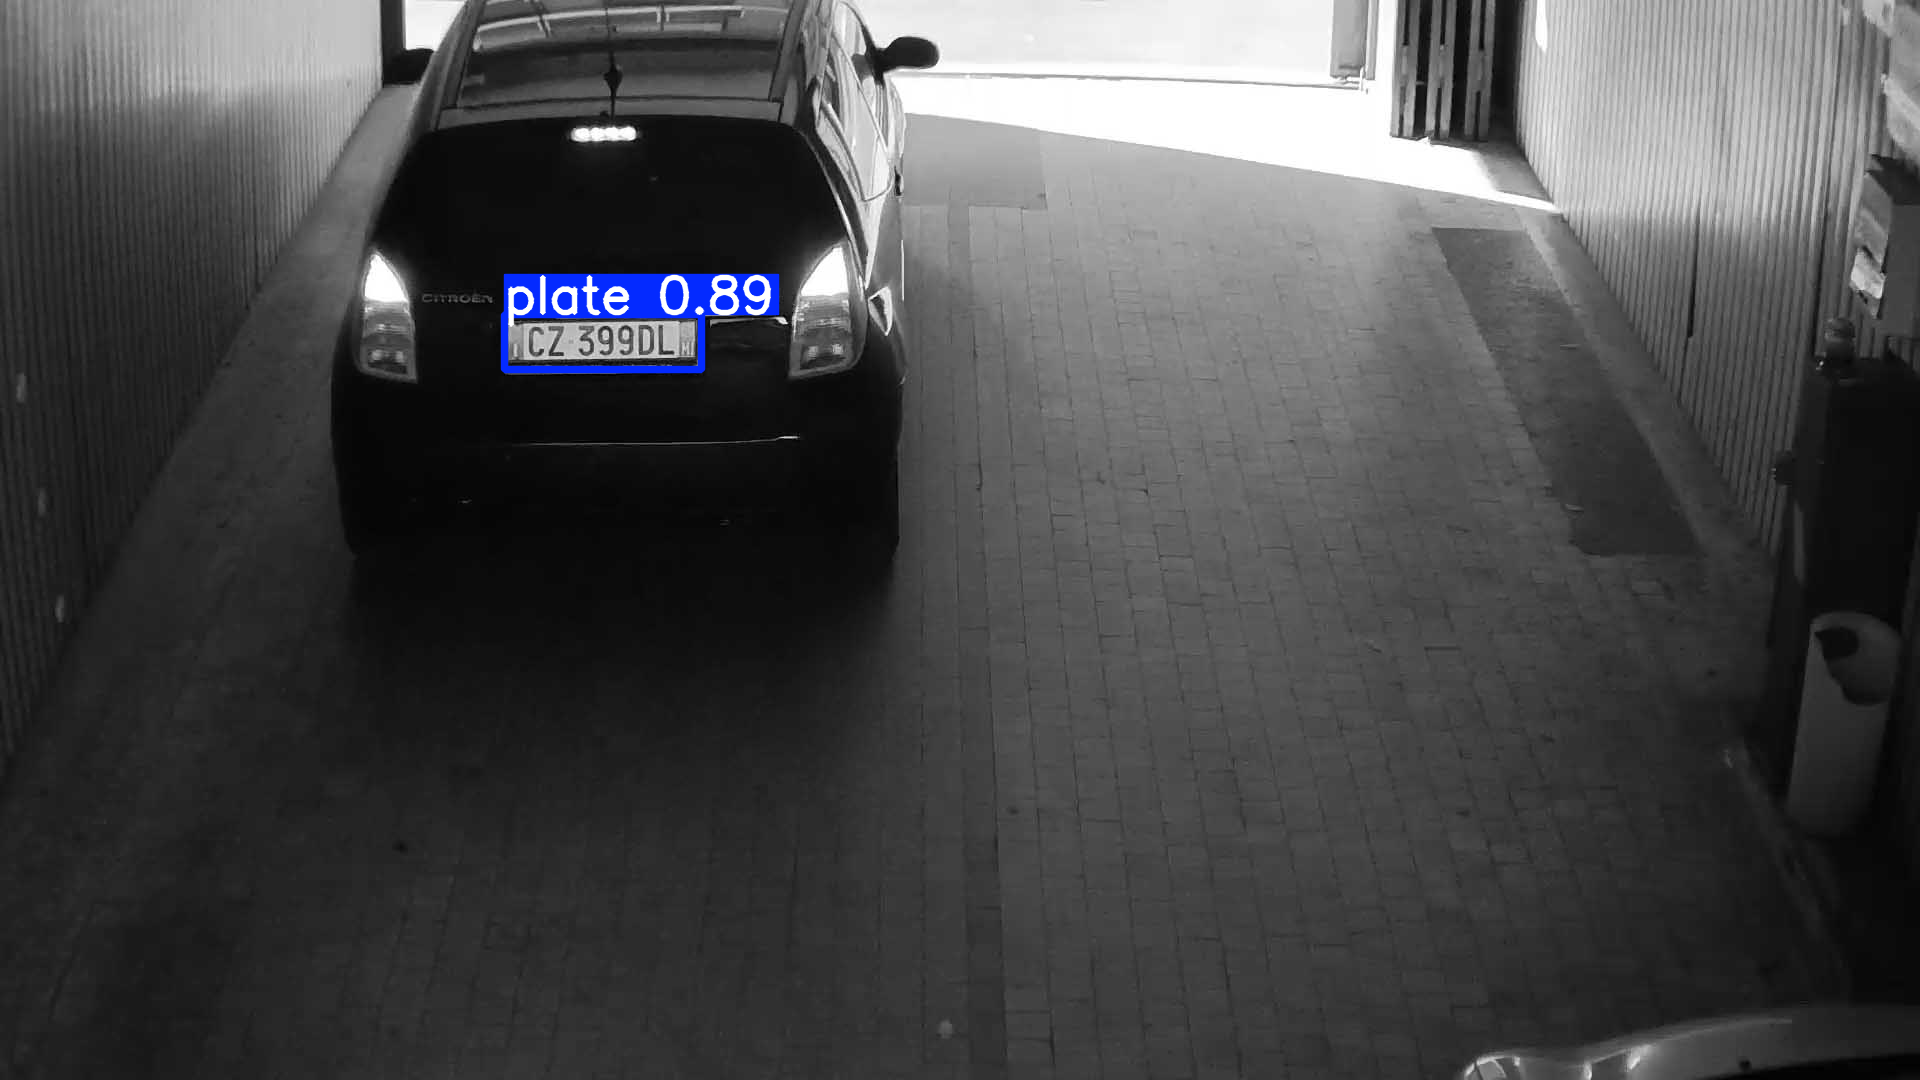

In [172]:
img_path = 'pr.jpg'  # Replace with your image path
results = model(img_path)
results.show()

In [164]:
import cv2

img = cv2.imread(img_path)
detections = results.xyxy[0].cpu().numpy()
detections

array([[     314.29,      327.93,      362.67,      344.01,     0.83957,           0],
       [     610.06,      328.84,      639.52,      346.94,     0.72933,           0]], dtype=float32)

Saved cropped plate: cropped_plates/plate_0.jpg
Saved cropped plate: cropped_plates/plate_1.jpg


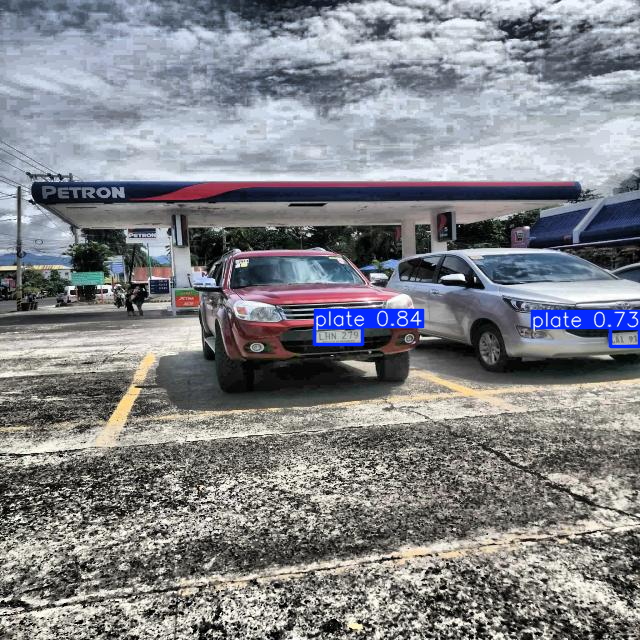

In [162]:
for i, detection in enumerate(detections):
    x_min, y_min, x_max, y_max, conf, cls = detection
    # Convert coordinates to integers
    x_min, y_min, x_max, y_max = int(x_min), int(y_min), int(x_max), int(y_max)
    
    # Crop the image using bounding box
    cropped_img = img[y_min:y_max, x_min:x_max]
    
    # Save cropped image
    crop_filename = f'{output_dir}/plate_{i}.jpg'
    cv2.imwrite(crop_filename, cropped_img)
    print(f'Saved cropped plate: {crop_filename}')

# Optionally, display results
results.show()  # Show original image with bounding boxes